In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib notebook

In [28]:
with open('/media/aaron/963AA6803AA65D4D/dataset/CMU/panoptic-toolbox/160906_band1/hdPose3d_stage1_coco19/body3DScene_00000300.json') as f:
    data = json.load(f)

In [29]:
data

{'version': 0.7,
 'univTime': 52301.066,
 'fpsType': 'hd_29_97',
 'bodies': [{'id': 0,
   'joints19': [144.703,
    -107.557,
    -39.2092,
    0.657654,
    143.997,
    -134.556,
    -38.4059,
    0.551636,
    126.191,
    -63.8103,
    -31.6071,
    0.424561,
    139.743,
    -108.495,
    -54.6945,
    0.601929,
    124.212,
    -85.7791,
    -56.3301,
    0.574951,
    105.122,
    -72.5112,
    -42.3617,
    0.485474,
    123.361,
    -63.4117,
    -42.3478,
    0.422913,
    83.9894,
    -46.4555,
    -44.8386,
    0.168091,
    0,
    0,
    0,
    -1,
    148.863,
    -107.083,
    -23.552,
    0.633972,
    133.801,
    -84.6202,
    -11.1093,
    0.605286,
    111.466,
    -71.5632,
    -18.5795,
    0.563904,
    129.022,
    -64.2091,
    -20.8663,
    0.444214,
    92.2137,
    -45.5755,
    -3.61445,
    0.29541,
    68.6331,
    -11.1927,
    -0.521312,
    0.242188,
    146.777,
    -136.093,
    -42.1375,
    0.457214,
    149.932,
    -126.33,
    -47.8462,
    0.35

In [30]:
people_joint = []

In [31]:
for i in range(len(data['bodies'])):
    joints = np.zeros((19,3))
    jointset = data['bodies'][i]['joints19']
    for i in range(0, 19):
        joints[i] = np.array(jointset[i*4:(i*4)+3])
    people_joint.append(joints)
    # data['bodies'][0]['joints19']

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.view_init(elev = -90, azim=-90)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# ax.axis('auto')

# Draw selected camera subset in blue
for joint in people_joint:
    for objpt in joint:
        ax.scatter(objpt[0], objpt[1], objpt[2], '.', color=[1,0,0])

<IPython.core.display.Javascript object>


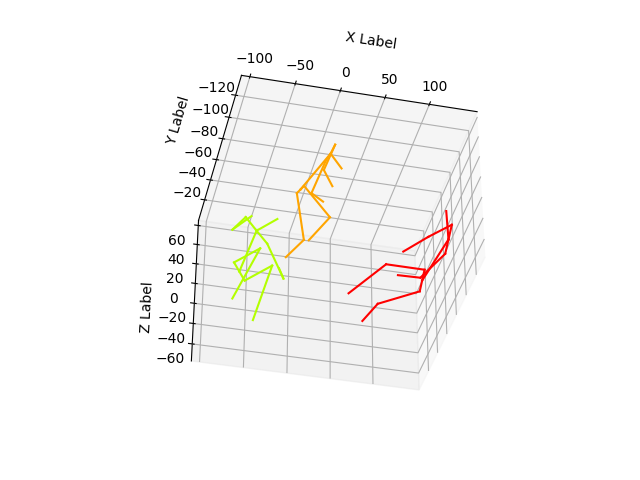

Text(0.5, 0, 'Z Label')

In [19]:
# Select HD Image index
hd_idx = 1500

# Setup paths
data_path = '/media/aaron/963AA6803AA65D4D/dataset/CMU/panoptic-toolbox/'
seq_name = '160906_band1'

hd_skel_json_path = data_path+seq_name+'/hdPose3d_stage1_coco19/'

#hd_img_path = data_path+seq_name+'/hdImgs/'

colors = plt.cm.hsv(np.linspace(0, 1, 10)).tolist()

<IPython.core.display.Javascript object>


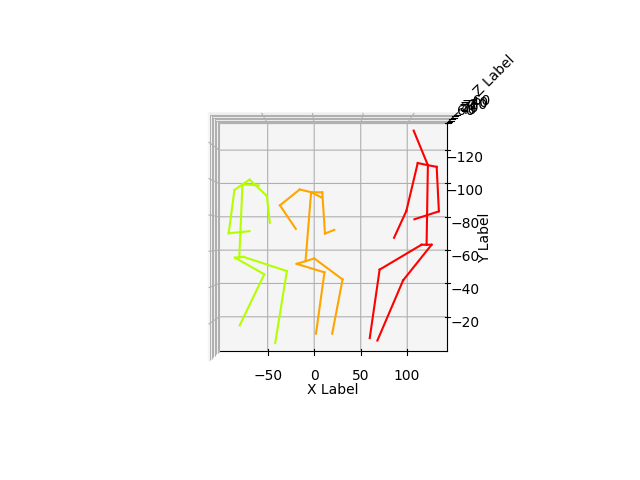

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = -90, azim=-90)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

'''
## Visualize 3D Body
'''
# Edges between joints in the body skeleton
body_edges = np.array([[1,2],[1,4],[4,5],[5,6],[1,3],[3,7],[7,8],[8,9],[3,13],[13,14],[14,15],[1,10],[10,11],[11,12]])-1

try:
    # Load the json file with this frame's skeletons
    skel_json_fname = hd_skel_json_path+'body3DScene_{0:08d}.json'.format(hd_idx)
    with open(skel_json_fname) as dfile:
        bframe = json.load(dfile)

    # Bodies
    for ids in range(len(bframe['bodies'])):
        body = bframe['bodies'][ids]
        skel = np.array(body['joints19']).reshape((-1,4)).transpose()

        for edge in body_edges:
            ax.plot(skel[0,edge], skel[1,edge], skel[2,edge], color=colors[body['id']])
            
except IOError as e:
    print('Error reading {0}\n'.format(skel_json_fname)+e.strerror)
plt.show()